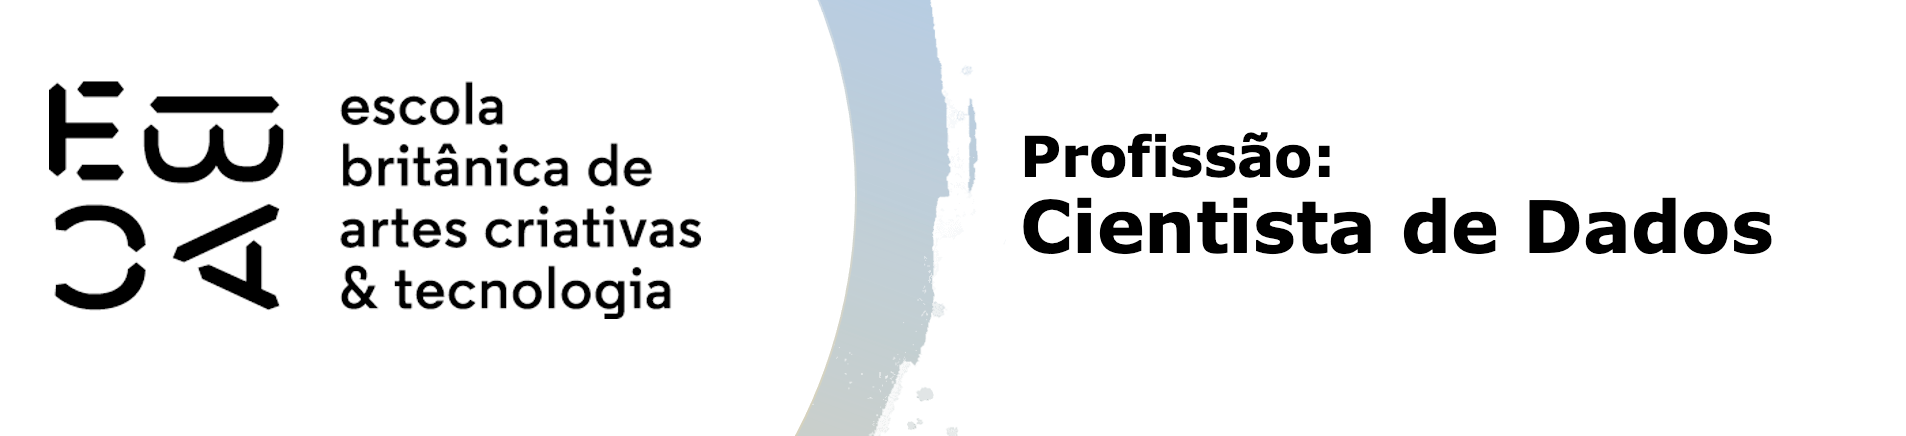

# Tarefa - Agrupamento hierárquico

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo agora é agrupar as sessões de acesso ao portal considerando o comportamento de acesso e informações da data, como a proximidade a uma data especial, fim de semana e o mês.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

In [5]:
df_shop_int = df[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'SpecialDay', 'Month']]
df_shop_int.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,SpecialDay,Month
0,0,0.0,0,0.0,1,0.000000,0.0,Feb
1,0,0.0,0,0.0,2,64.000000,0.0,Feb
2,0,0.0,0,0.0,1,0.000000,0.0,Feb
3,0,0.0,0,0.0,2,2.666667,0.0,Feb
4,0,0.0,0,0.0,10,627.500000,0.0,Feb


## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

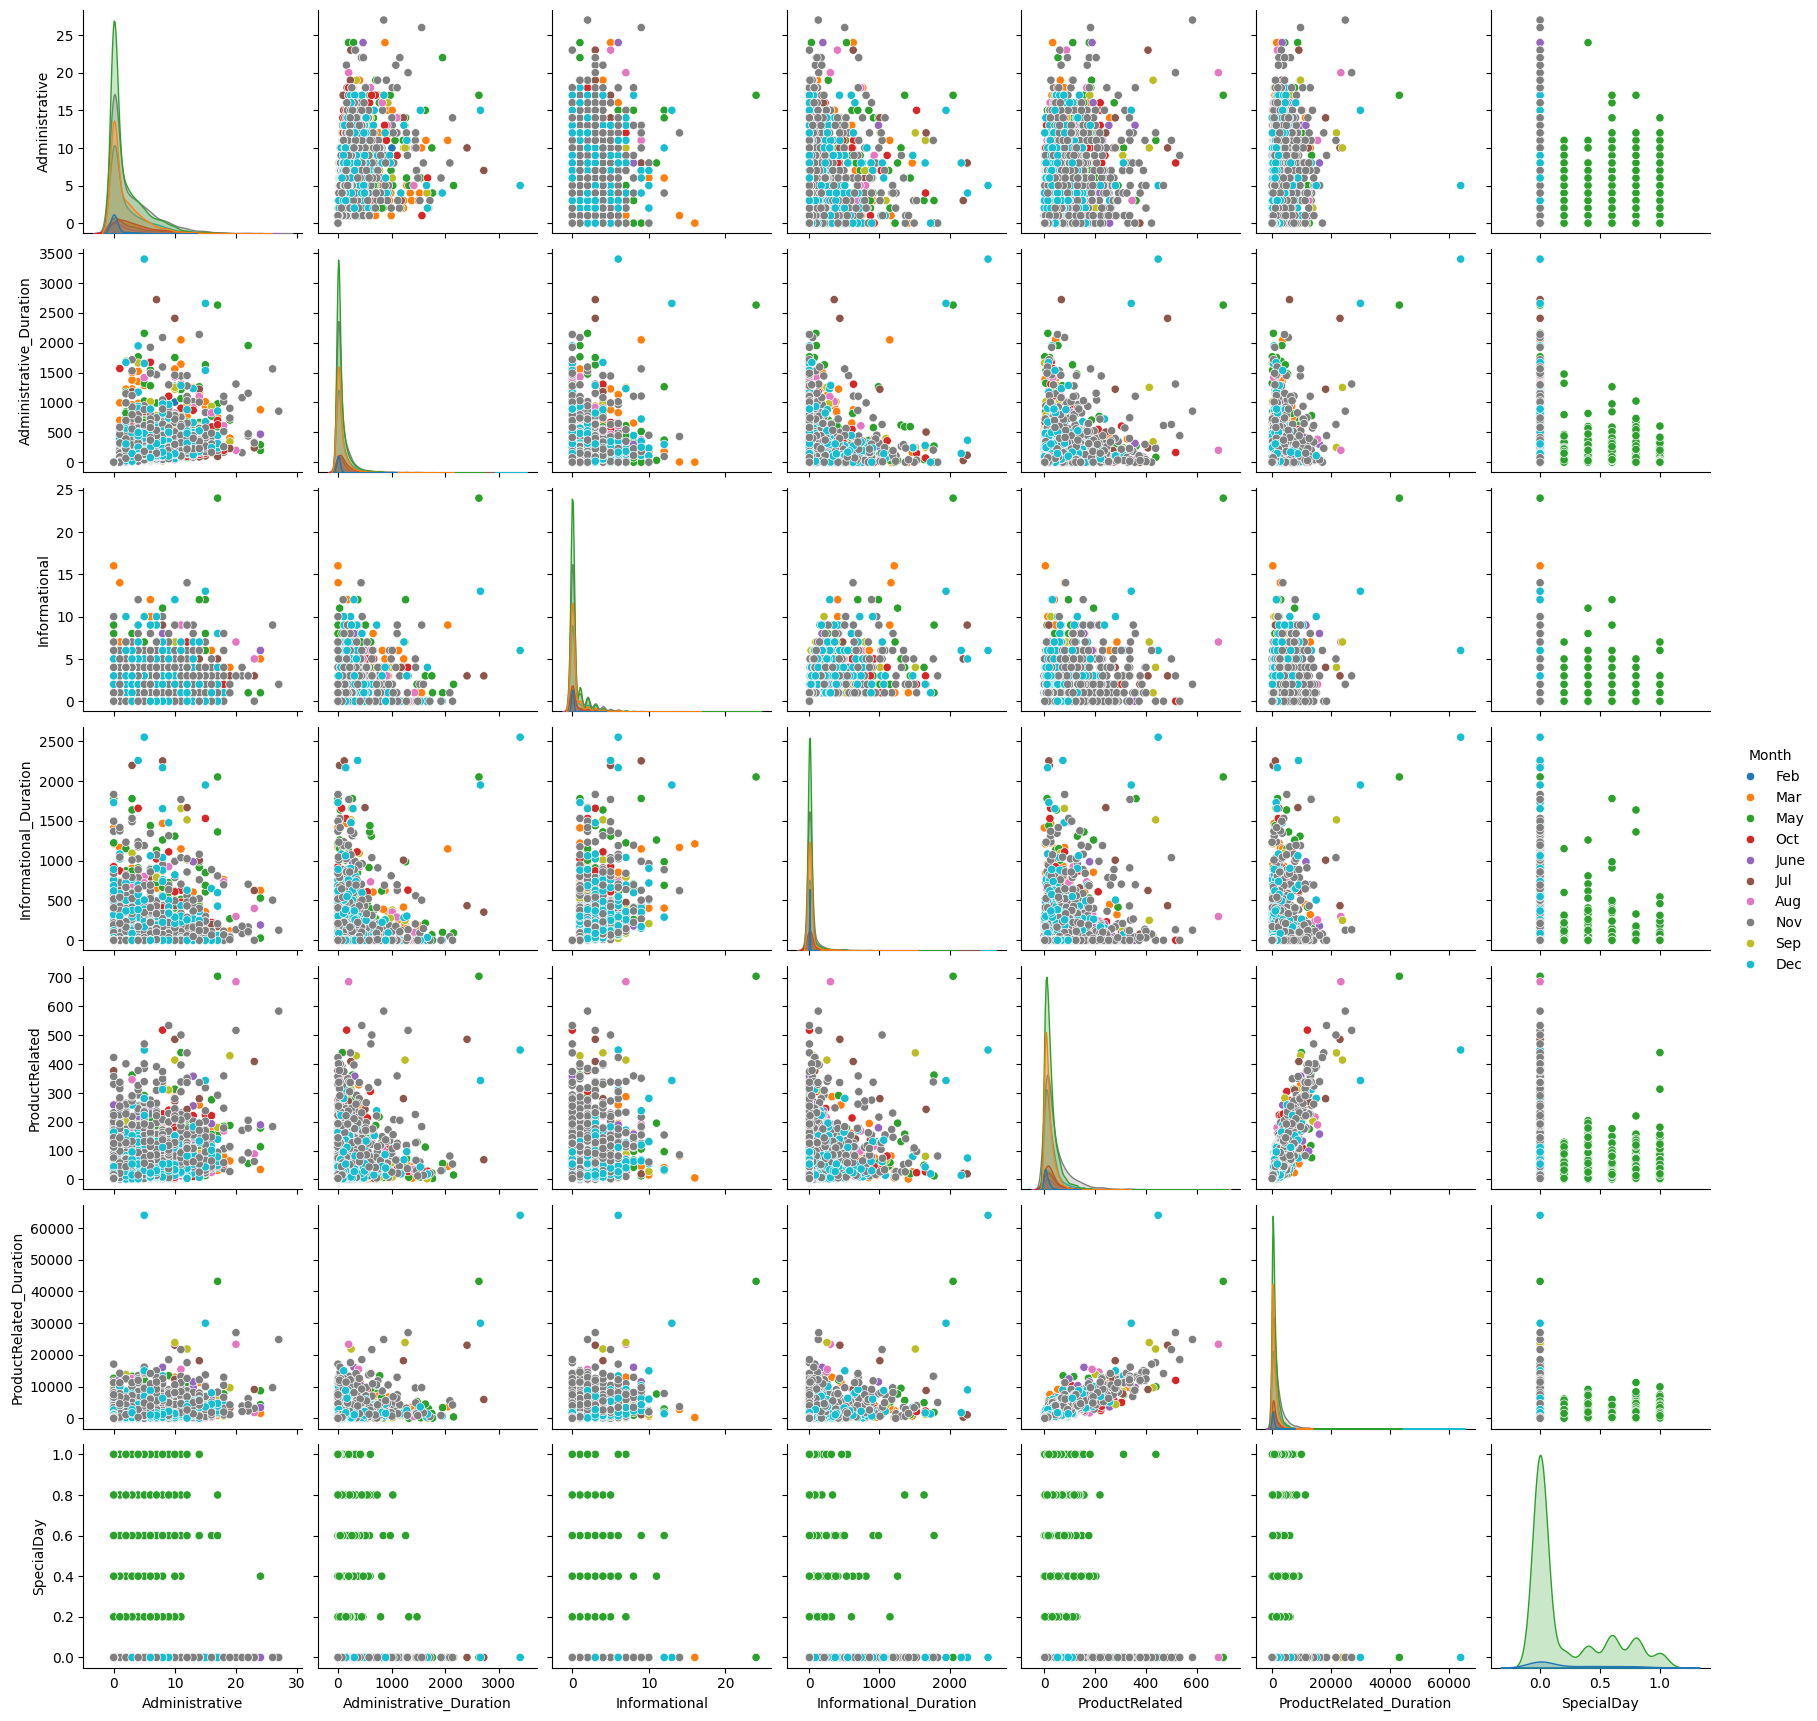

In [6]:
# Distribuição das variáveis
sns.pairplot(data=df_shop_int, hue='Month')

In [7]:
# Há valores ausentes?
df_shop_int.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
SpecialDay                 0
Month                      0
dtype: int64

## Variáveis de agrupamento

Liste as variáveis que você vai querer utilizar. Essa é uma atividade importante do projeto, e tipicamente não a recebemos pronta. Não há resposta pronta ou correta, mas apenas critérios e a sua decisão. Os critérios são os seguintes:

- Selecione para o agrupamento variáveis que descrevam o padrão de navegação na sessão.
- Selecione variáveis que indiquem a característica da data.
- Não se esqueça de que você vai precisar realizar um tratamento especial para variáveis qualitativas.
- Trate adequadamente valores faltantes.

In [8]:
# Cria variáveis dummy para 'Month'
df_shop_int = pd.get_dummies(df_shop_int, columns=['Month'])

# Seleciona as variáveis desejadas, excluindo 'Month' original
variaveis = df_shop_int[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'SpecialDay']]

# Concatena as colunas dummy de 'Month' ao DataFrame de variáveis
variaveis = pd.concat([variaveis, df_shop_int.drop(['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'SpecialDay'], axis=1)], axis=1)

variaveis.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,SpecialDay,ProductRelated,ProductRelated_Duration,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0.0,0,0.0,0.0,1,0.000000,False,False,True,False,False,False,False,False,False,False
1,0,0.0,0,0.0,0.0,2,64.000000,False,False,True,False,False,False,False,False,False,False
2,0,0.0,0,0.0,0.0,1,0.000000,False,False,True,False,False,False,False,False,False,False
3,0,0.0,0,0.0,0.0,2,2.666667,False,False,True,False,False,False,False,False,False,False
4,0,0.0,0,0.0,0.0,10,627.500000,False,False,True,False,False,False,False,False,False,False


## Número de grupos

Nesta atividade vamos adotar uma abordagem bem pragmática e avaliar agrupamentos hierárquicos com 3 e 4 grupos, por estarem bem alinhados com uma expectativa e estratégia do diretor da empresa. 

*Atenção*: Cuidado se quiser fazer o dendrograma, pois com muitas observações ele pode ser mais complicado de fazer, e dependendo de como for o comando, ele pode travar o *kernell* do seu python.

In [9]:
from sklearn.cluster import AgglomerativeClustering

In [10]:
# Converte os dados para um formato adequado para o scikit-learn
X = variaveis.values

In [11]:
# Definir o modelo de clustering hierárquico
model_three = AgglomerativeClustering(n_clusters=3)
model_four = AgglomerativeClustering(n_clusters=4)

# Ajustar o modelo aos dados
clusters_three = model_three.fit_predict(X)
clusters_four = model_four.fit_predict(X)

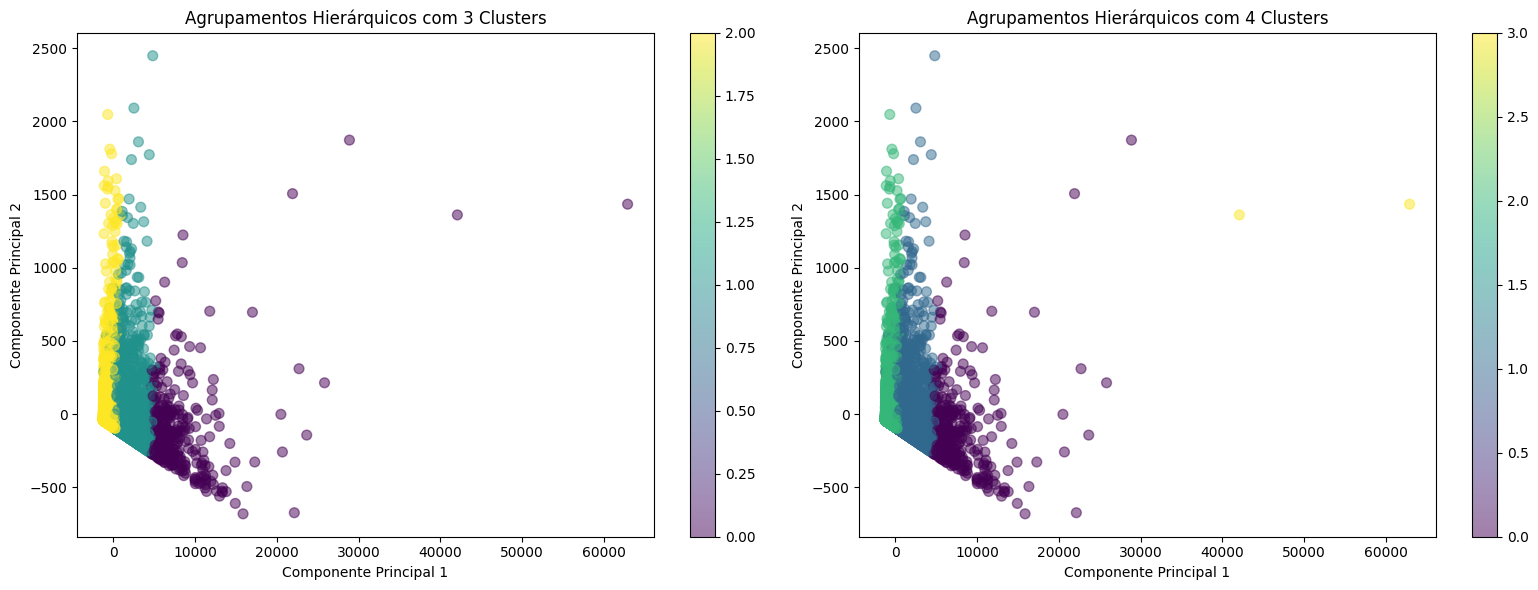

In [12]:
# Plotar os clusters (usando PCA para redução de dimensionalidade para visualização)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(16, 6))

# Plotar os clusters com 3 clusters
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_three, cmap='viridis', s=50, alpha=0.5)
plt.title('Agrupamentos Hierárquicos com 3 Clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar()

# Plotar os clusters com 4 clusters
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_four, cmap='viridis', s=50, alpha=0.5)
plt.title('Agrupamentos Hierárquicos com 4 Clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar()

plt.tight_layout(h_pad=3.0)
plt.show()

## Avaliação dos grupos

Construa os agrupamentos com a técnica adequada que vimos em aula. Não se esqueça de tratar variáveis qualitativas, padronizar escalas das quantitativas, tratar valores faltantes e utilizar a distância correta.

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [13]:
variaveis.columns.values 

cat_var = [True if x in {'Month_Aug',	'Month_Dec',	'Month_Feb',	'Month_Jul',	'Month_June',	'Month_Mar',	'Month_May',	'Month_Nov,'	'Month_Oct',	'Month_Sep'} else False for x in variaveis.columns]

In [14]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from gower import gower_matrix

In [15]:
# Calculando a distância
gower = gower_matrix(variaveis, cat_features=cat_var)

In [16]:
# Padronização 
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
df_pad = standard.fit_transform(variaveis)

In [17]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

In [18]:
# Aplicar PCA para redução de dimensionalidade
pca = PCA(n_components=0.95)  
df_pca = pca.fit_transform(df_pad)

In [19]:
# Realizar o agrupamento hierárquico nos componentes principais
Z_pca = linkage(df_pca, method='average', optimal_ordering=True)

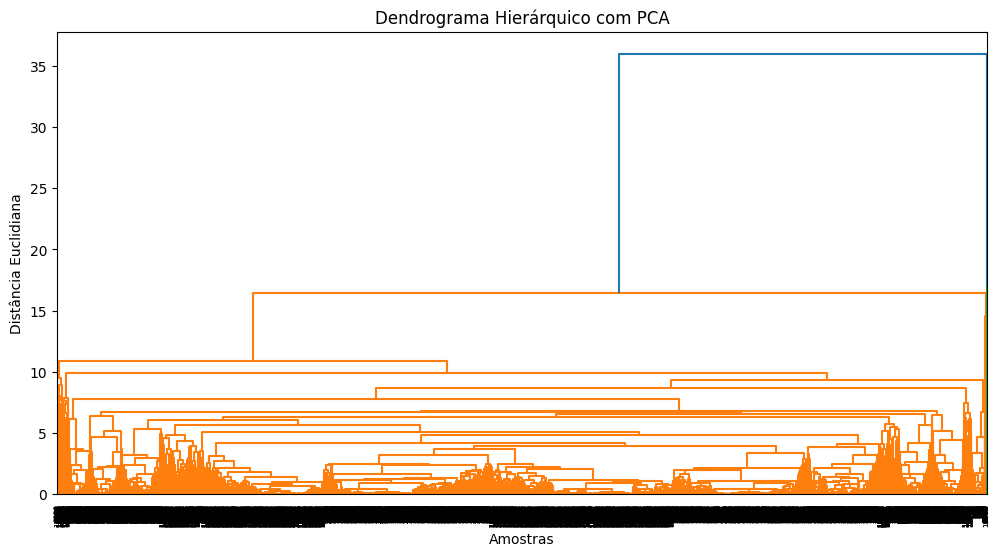

In [20]:
# Plotar o dendrograma para visualização
plt.figure(figsize=(12, 6))
dendrogram(Z_pca)
plt.title('Dendrograma Hierárquico com PCA')
plt.xlabel('Amostras')
plt.ylabel('Distância Euclidiana')
plt.show();

In [21]:
# Obter os rótulos dos grupos para 3 e 4 clusters
labels_3 = fcluster(Z_pca, t=3, criterion='maxclust')
labels_4 = fcluster(Z_pca, t=4, criterion='maxclust')

In [41]:
# Adicionar os rótulos de clusters aos dados originais para análise descritiva
variaveis['Cluster_3'] = labels_3
variaveis['Cluster_4'] = labels_4

In [42]:
# Separar colunas numéricas e categóricas
num_cols = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'SpecialDay']
cat_cols = ['Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep']

In [43]:
# Análise descritiva para os clusters com 3 grupos - colunas numéricas
desc_3_num = variaveis.groupby('Cluster_3')[num_cols].agg(['mean', 'std', 'min', 'max'])

In [44]:
# Análise descritiva para os clusters com 3 grupos - coluna categórica
desc_3_cat = variaveis.groupby('Cluster_3')[cat_cols].agg(lambda x: x.mode()[0])

In [49]:
# Análise descritiva para os clusters com 4 grupos
desc_4_num = variaveis.groupby('Cluster_4').agg(['mean', 'std', 'min', 'max'])

In [50]:
desc_4_cat = variaveis.groupby('Cluster_4')[cat_cols].agg(lambda x: x.mode()[0])

In [51]:
# Combinar resultados numéricos e categóricos
desc_3 = pd.concat([desc_3_num, desc_3_cat], axis=1)

# Combinar resultados numéricos e categóricos
desc_4 = pd.concat([desc_4_num, desc_4_cat], axis=1)

In [52]:
# Exibir as estatísticas descritivas (média) para cada cluster com 3 e 4 grupos
print("Estatísticas Descritivas para 3 Grupos:")
print(desc_3)
print("\nEstatísticas Descritivas para 4 Grupos:")
print(desc_4)

Estatísticas Descritivas para 3 Grupos:
           (Administrative, mean)  (Administrative, std)  \
Cluster_3                                                  
1                        2.312728               3.317498   
2                       16.000000               1.414214   
3                        5.000000                    NaN   

           (Administrative, min)  (Administrative, max)  \
Cluster_3                                                 
1                              0                     27   
2                             15                     17   
3                              5                      5   

           (Administrative_Duration, mean)  (Administrative_Duration, std)  \
Cluster_3                                                                    
1                                80.133702                      171.170684   
2                              2643.286012                       19.844307   
3                              3398.750000         

Após analisar a homogeneidade e a interpretação dos clusters, acho que os 3 clusters oferecem uma segmentação mais clara e interpretável. Os clusters de 4 grupos apresentam uma subdivisão que pode não ser tão distinta quanto os clusters de 3 grupos.

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [59]:
# Adicionar'BounceRates' e 'revenue' ao DataFrame 
variaveis['BounceRates'] = df['BounceRates']
variaveis['Revenue'] = df['Revenue']

In [61]:
# Análise descritiva para 'bounce_rate' e 'revenue' com 3 clusters
bounce_rate_3 = variaveis.groupby('Cluster_3')['BounceRates'].mean()
revenue_3 = variaveis.groupby('Cluster_3')['Revenue'].mean()

In [62]:
# Análise descritiva para 'bounce_rate' e 'revenue' com 4 clusters
bounce_rate_4 = variaveis.groupby('Cluster_4')['BounceRates'].mean()
revenue_4 = variaveis.groupby('Cluster_4')['Revenue'].mean()

In [63]:
print("Bounce Rate para 3 Grupos:")
print(bounce_rate_3)
print("\nRevenue para 3 Grupos:")
print(revenue_3)

print("\nBounce Rate para 4 Grupos:")
print(bounce_rate_4)
print("\nRevenue para 4 Grupos:")
print(revenue_4)

Bounce Rate para 3 Grupos:
Cluster_3
1    0.022196
2    0.005084
3    0.000764
Name: BounceRates, dtype: float64

Revenue para 3 Grupos:
Cluster_3
1    0.154782
2    0.000000
3    0.000000
Name: Revenue, dtype: float64

Bounce Rate para 4 Grupos:
Cluster_4
1    0.022216
2    0.009115
3    0.005084
4    0.000764
Name: BounceRates, dtype: float64

Revenue para 4 Grupos:
Cluster_4
1    0.154452
2    0.368421
3    0.000000
4    0.000000
Name: Revenue, dtype: float64


Cluster 2 na solução com 4 grupos é o grupo mais propenso a comprar, dado que tem a maior revenue (0.368421) e uma bounce_rate relativamente baixa (0.009115).

Nomes Sugeridos para os Grupos:

Para 4 Grupos:
* Cluster 1: Potenciais Compradores Moderados
* Cluster 2: Compradores Ativos
* Cluster 3: Navegadores
* Cluster 4: Visitantes Rápidos